In [2]:
# Surpress all warnings
import warnings
warnings.filterwarnings("ignore")

# Import all necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from pandas.plotting import scatter_matrix

# Set precision
pd.set_option('display.precision', 14)

# Read raw training data for element Co and convert them into DataFrame
raw_data = pd.read_excel('data/Co_temperature.xlsx')
# raw_data = pd.read_excel('data/data with updated BSCF.xlsx')
raw_data.drop(raw_data.columns[0], axis=1,inplace=True)
raw_data.dropna(axis='rows', inplace=True)

print("Shape of the dataset: " + str(raw_data.shape))
raw_data.info()
raw_data.head(n=5)  # show the first 5 rows of the dataset

Shape of the dataset: (2847, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 2847 entries, 0 to 3054
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Samples            2847 non-null   object 
 1   Oxygen vacancy     2847 non-null   float64
 2   Polarization       2847 non-null   float64
 3   Charge             2847 non-null   float64
 4   Electronegativity  2847 non-null   float64
 5   Radius A-site      2847 non-null   float64
 6   Radius B-site      2847 non-null   float64
 7   Tolerance factor   2847 non-null   float64
 8   Temperature        2847 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 222.4+ KB


,Samples,Oxygen vacancy,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site,Tolerance factor,Temperature
0,Pr1Ba0.5Sr0.5Co2O5+x,0.09582815321631,5.13235634999658,2.50000000000000,1.18000000000000,1.352,0.610000,0.97616997689958,25
1,La0.6Sr0.4Co1O3-δ,0.10569000000000,5.08169934640523,2.60000000000000,1.19200000000000,1.392,0.610000,0.99067473138546,25
2,La0.6Sr0.4Fe0.2Co0.8O3-δ,0.03936203966423,6.56033085068653,2.66666666666667,1.29333333333333,1.392,0.617000,0.98713118354709,25
3,Sr0.95Ag0.05Nb0.1Co0.9O3-δ,0.43200000000000,5.98563762626263,2.22727272727273,1.12500000000000,1.432,0.613000,1.00363543136155,25
4,Sr1Sc0.175Nb0.025Co0.8O3-δ,0.48835581334300,4.89036186459110,2.20833333333333,1.10875000000000,1.440,0.634375,0.99563499927754,25


In [3]:
raw_data.describe()

,Oxygen vacancy,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site,Tolerance factor,Temperature
count,2847.00000000000000,2847.00000000000000,2847.00000000000000,2847.00000000000000,2847.00000000000000,2847.00000000000000,2847.00000000000000,2847.00000000000000
mean,0.25208130289998,5.85335092809574,2.46845125322940,1.17928182765064,1.40928709187820,0.61838771929825,0.99272499622362,490.92026694766423
std,0.14845153195287,1.44125644926098,0.15272888687087,0.08782987322090,0.06917416559168,0.01643889506543,0.02557498287719,210.94776499760118
min,-0.00229500000000,2.72371750632620,2.00000000000000,0.96181818181818,1.24020000000000,0.59600000000000,0.92552881721289,25.00000000000000
25%,0.14746250000000,4.93384360505627,2.40000000000000,1.12550000000000,1.37625000000000,0.61000000000000,0.97798848343214,350.00000000000000
50%,0.23786000000000,5.38247502167252,2.50000000000000,1.15952380952381,1.39775000000000,0.61000000000000,0.99183559536015,500.00000000000000
75%,0.33938500000000,6.63909156852705,2.55000000000000,1.21974545454545,1.44000000000000,0.61890000000000,1.00498816549008,650.00000000000000
max,0.98181800000000,10.72658519426289,2.91666666666667,1.47636363636364,1.61000000000000,0.70600000000000,1.06426785943894,800.00000000000000


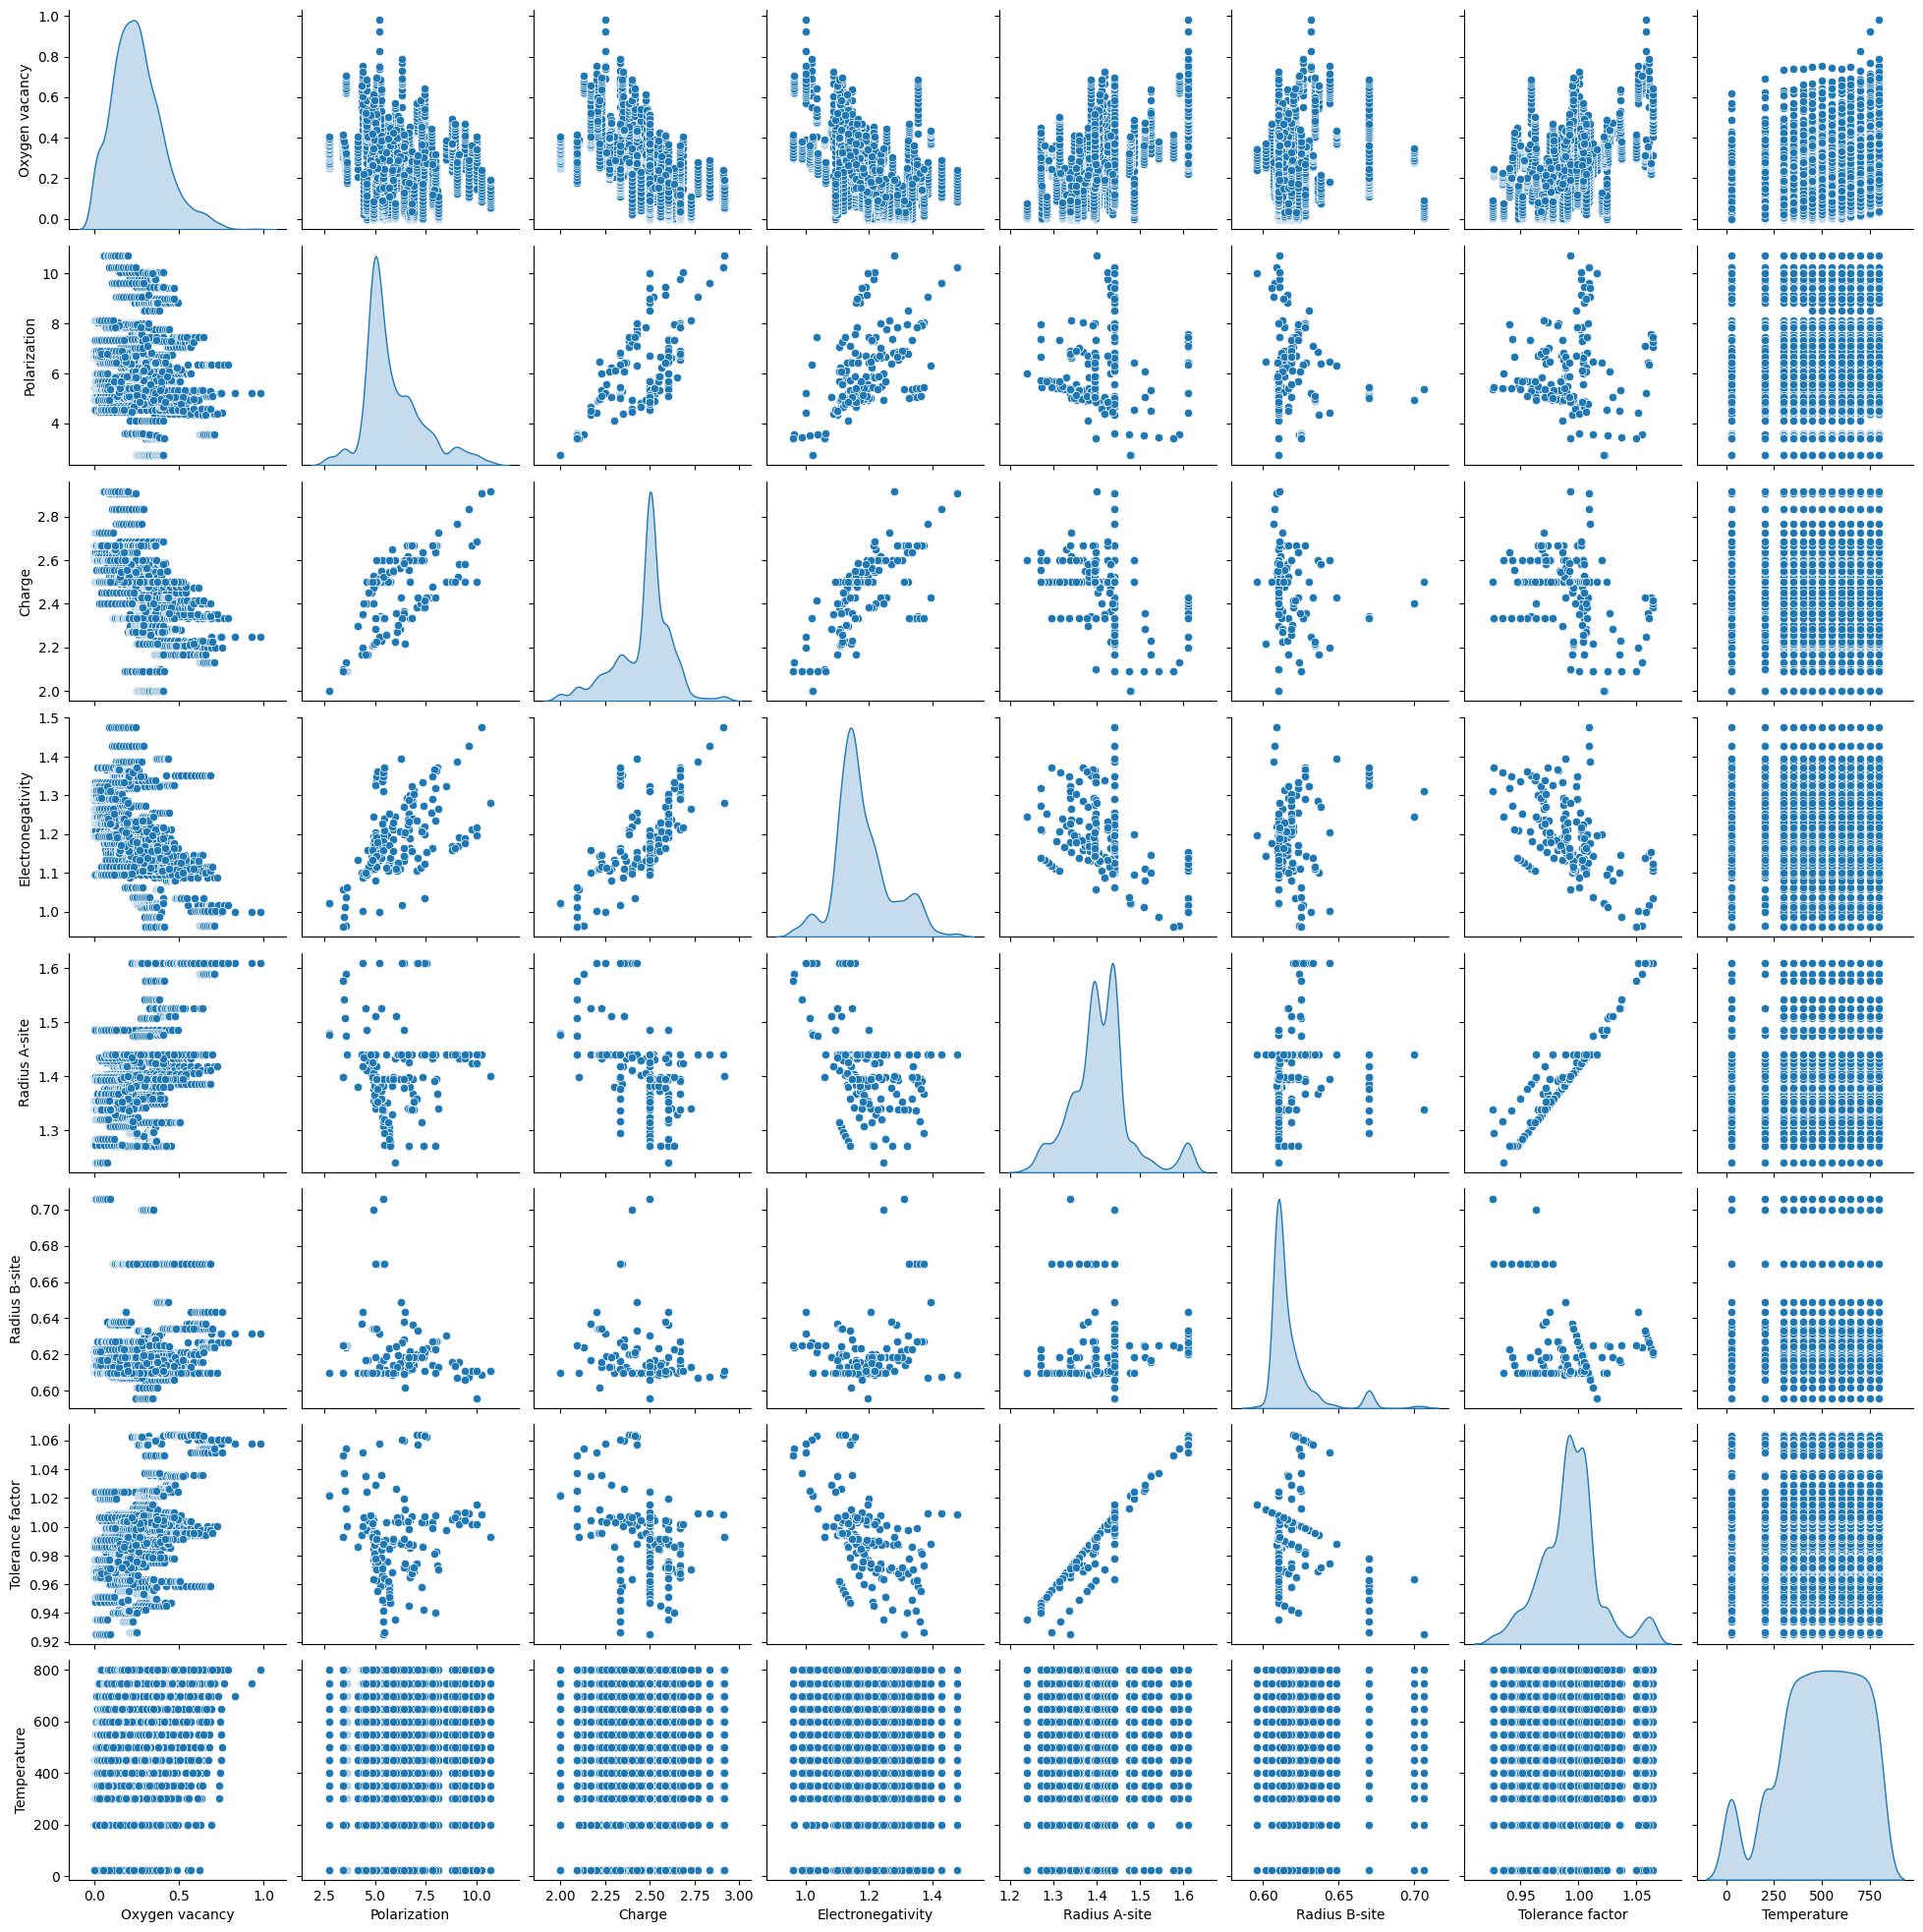

In [4]:
sns.pairplot(raw_data, diag_kind="kde")

In [5]:
# take "Oxygen vacancy" as our label, and everything else as features
LABEL = "Oxygen vacancy"

Y = raw_data.loc[:, LABEL].values
X = raw_data.iloc[:, 2:]

random_state = 1
X, y = shuffle(X, Y, random_state=random_state)
X.head()

,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site,Tolerance factor,Temperature
1968,6.07638888888889,2.27272727272727,1.10636363636364,1.44000,0.613000,1.00653192611296,600
1269,4.90793149892028,2.50000000000000,1.15250000000000,1.40375,0.610000,0.99493550301569,450
2498,4.89036186459110,2.20833333333333,1.10875000000000,1.44000,0.634375,0.99563499927754,700
707,6.56033085068653,2.66666666666667,1.29333333333333,1.39200,0.617000,0.98713118354709,350
1210,10.26523117416647,2.90909090909091,1.47636363636364,1.44000,0.609000,1.00859766634100,450


In [6]:
# Split our dataset into training and testing (4:1 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Initialize a simple gradient boosting regressor
reg = LGBMRegressor(n_estimators=100, random_state=random_state, verbose=-1)
reg.fit(X_train, y_train)
print(f"Test R2 score: {reg.score(X_test, y_test):f}")
predictions = reg.predict(X_test)

# save the model to disk
filename = 'regressor.sav'
pickle.dump(reg, open(filename, 'wb'))

Test R2 score: 0.920425


In [7]:
import shap
# shapely featrue analysis. refererence: https://shap.readthedocs.io/en/latest/index.html
shap_values = shap.TreeExplainer(reg).shap_values(X_test)

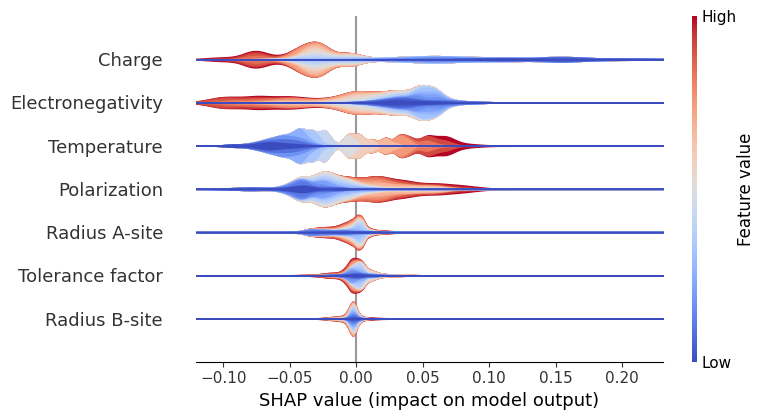

In [8]:
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="layered_violin",
    color="coolwarm",
) #red represents large values of a variable, and blue represents small ones.

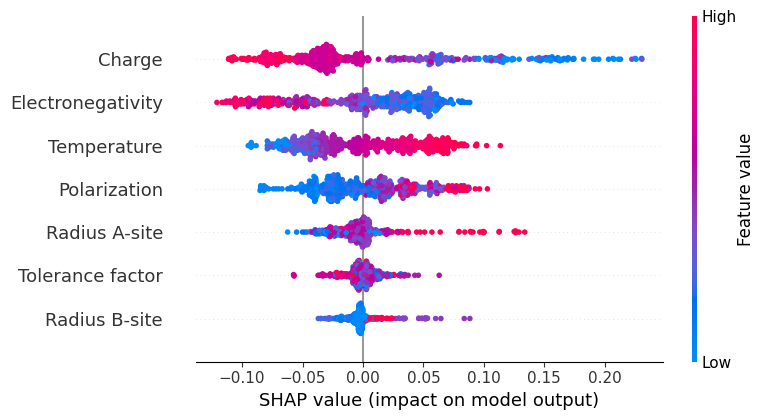

In [9]:
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig('Shap.jpg', dpi=600)

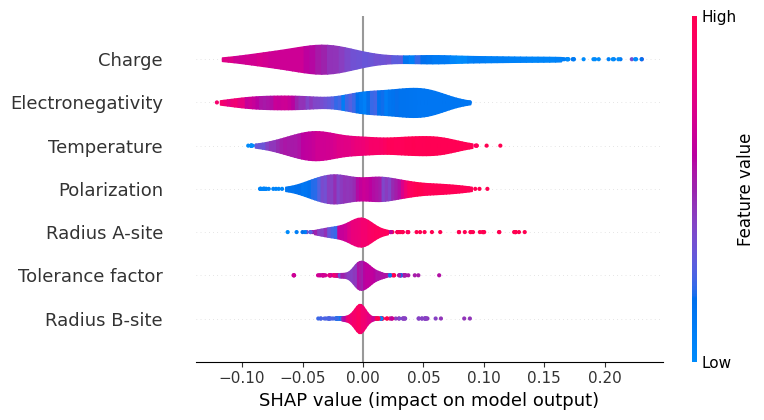

In [10]:
shap.summary_plot(shap_values, X_test, plot_type="violin")

In [11]:
# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

# Initialize a gradient boost regressor
reg = LGBMRegressor(n_estimators=100, random_state=random_state, verbose=-1, njobs=-1)

# Initialize DataFrame to store the results
df_preds = pd.DataFrame()
df_gt = pd.DataFrame()
df_preds_train = pd.DataFrame()
df_gtrain = pd.DataFrame()

kf = KFold(n_splits=5, random_state=random_state, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    predictions_train = reg.predict(X_train)

    print('5-fold eval: R2 {} | MSE {}'.format(r2_score(y_test, predictions), mean_squared_error(y_test, predictions)))

df_preds = pd.concat([df_preds, pd.DataFrame(predictions)], ignore_index=True)
df_gt = pd.concat([df_gt, pd.DataFrame(y_test)], ignore_index=True)
df_preds_train = pd.concat([df_preds_train,pd.DataFrame(predictions_train)], ignore_index = True)
df_gtrain = pd.concat([df_gtrain, pd.DataFrame(y_train)], ignore_index=True)

# Save the results to Excel
with pd.ExcelWriter('Co_LGBMRegressor_5fold_preds_gt.xlsx') as writer:
    df_preds.to_excel(writer, sheet_name='test Prediction')
    df_gt.to_excel(writer, sheet_name='test Ground_truth')
    df_preds_train.to_excel(writer, sheet_name = 'train Prediction')
    df_gtrain.to_excel(writer, sheet_name='train Ground_truth')


5-fold eval: R2 0.9204253973514079 | MSE 0.0016864050251662527
5-fold eval: R2 0.9020298596951412 | MSE 0.002142151524854795
5-fold eval: R2 0.908699988410481 | MSE 0.001957838852996594
5-fold eval: R2 0.9205137760286228 | MSE 0.0016521185854426097
5-fold eval: R2 0.9217106498166426 | MSE 0.0019352155365703137


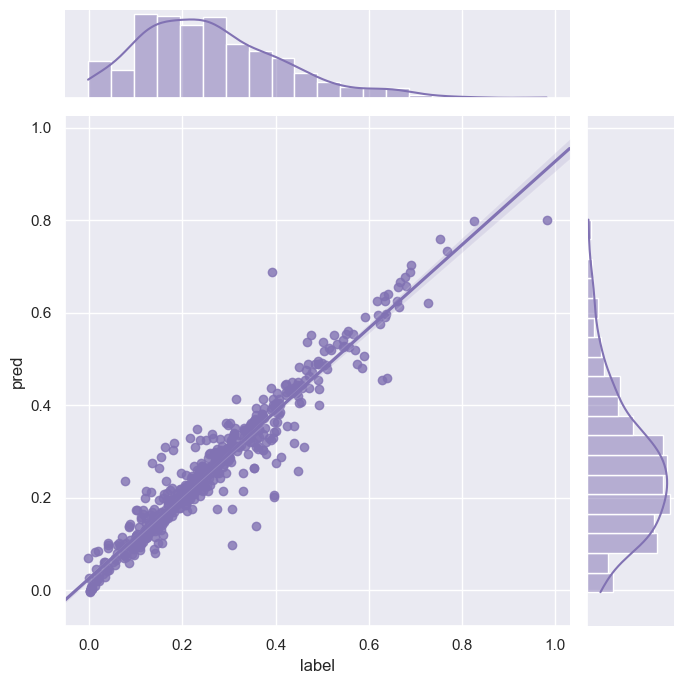

In [12]:
vis_data = pd.DataFrame.from_records({'pred': predictions, 'label': y_test})
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="label", y="pred", data=vis_data,
                  kind="reg", truncate=False,
                  color="m", height=7)

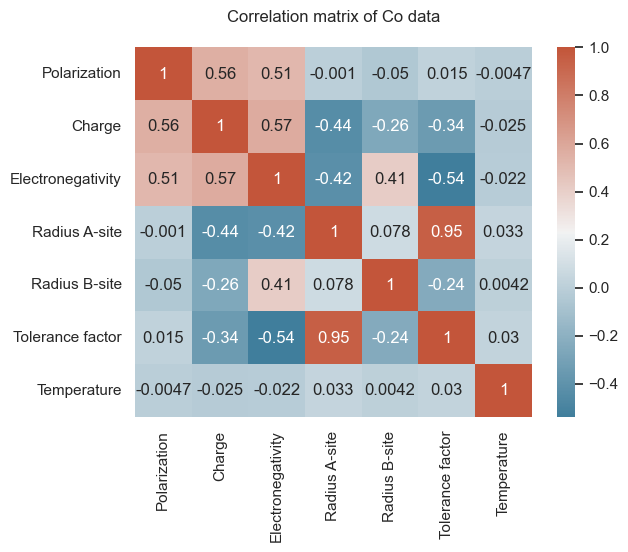

In [13]:
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
hm = sns.heatmap(X.corr(), cmap=cmap, annot = True)
hm.set(title = "Correlation matrix of Co data\n")

plt.show()

Computing partial dependence plots...
done in 3.146s


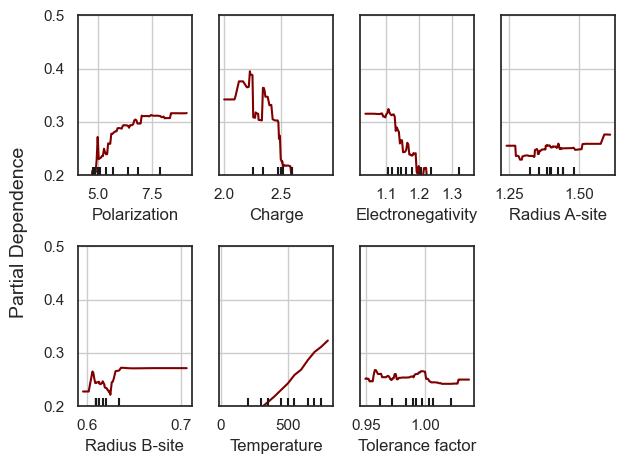

In [14]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from time import time
from sklearn.pipeline import make_pipeline


features = ["Polarization", "Charge", "Electronegativity", "Radius A-site", "Radius B-site", "Temperature", 'Tolerance factor']
print("Computing partial dependence plots...")

tic = time()

fig, axes = plt.subplots(2, 4)


axes = axes.flatten()
for i, feature in enumerate(features):
    disp = PartialDependenceDisplay.from_estimator(reg, X_train, [feature], ax=axes[i], line_kw={'color':"maroon"})
    plt.ylabel('')
    plt.ylim([0.2, 0.5])
    plt.grid(True, axis="both")
    # axes[i].set_facecolor('mistyrose')
    plt.yticks(np.arange(0.2, 0.51, 0.1))
    
    
    if i not in [0,4]:
        plt.yticks(np.arange(0.2, 0.51, 0.1), labels=[])




# PartialDependenceDisplay.from_estimator(reg, X_train, features)
fig.delaxes(axes[-1])
# plt.tight_layout()

plt.tight_layout(rect=[0.05, 0, 1, 1])

print("done in {:.3f}s".format(time() - tic))
fig = plt.gcf()
fig.text(0.04, 0.5, 'Partial Dependence', va='center', ha='center', rotation='vertical', fontsize=14)


plt.savefig('partial dependence.jpg', dpi=600)


In [266]:
import lazypredict.Supervised


current_regressors = lazypredict.Supervised.REGRESSORS
filtered_regressors = [reg for reg in current_regressors if reg[0] != 'QuantileRegressor']
lazypredict.Supervised.REGRESSORS = filtered_regressors

# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

# Initialize a lazy regressor
reg = lazypredict.Supervised.LazyRegressor(predictions=True, ignore_warnings=False, verbose=True)
models, prediction = reg.fit(X_train, X_test, y_train, y_test)

 17%|█▋        | 7/41 [00:00<00:01, 23.59it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6896668158061039, 'Adjusted R-Squared': 0.6857945657359483, 'RMSE': 0.08758453641952742, 'Time taken': 0.1321260929107666}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9048699833676858, 'Adjusted R-Squared': 0.9036829778125588, 'RMSE': 0.0484922251778356, 'Time taken': 0.055589914321899414}
{'Model': 'BayesianRidge', 'R-Squared': 0.585847701596973, 'Adjusted R-Squared': 0.5806800258593239, 'RMSE': 0.10117969473511607, 'Time taken': 0.008439779281616211}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8830224722556228, 'Adjusted R-Squared': 0.881562859609971, 'RMSE': 0.05377303462388039, 'Time taken': 0.011888980865478516}
{'Model': 'DummyRegressor', 'R-Squared': -0.006753128055158264, 'Adjusted R-Squared': -0.019315110045151407, 'RMSE': 0.15775198063256676, 'Time taken': 0.006595134735107422}
{'Model': 'ElasticNet', 'R-Squared': -0.006753128055158264, 'Adjusted R-Squared': -0.019315110045151407, 'RMSE': 0.15775198063256676, 'Time taken': 

 24%|██▍       | 10/41 [00:00<00:02, 14.19it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8948249789653582, 'Adjusted R-Squared': 0.8935126346743734, 'RMSE': 0.05098819412541873, 'Time taken': 0.32500505447387695}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 29%|██▉       | 12/41 [00:01<00:03,  7.48it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -27.22603619736933, 'Adjusted R-Squared': -27.57823272746128, 'RMSE': 0.8352919075561452, 'Time taken': 0.42798280715942383}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8673540773484932, 'Adjusted R-Squared': 0.8656989588840359, 'RMSE': 0.05726117813759773, 'Time taken': 0.17832016944885254}


 34%|███▍      | 14/41 [00:01<00:03,  6.97it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9223368229441765, 'Adjusted R-Squared': 0.9213677636939256, 'RMSE': 0.04381480702093163, 'Time taken': 0.3042027950286865}
{'Model': 'HuberRegressor', 'R-Squared': 0.5779889207772788, 'Adjusted R-Squared': 0.572723185385908, 'RMSE': 0.1021351552184795, 'Time taken': 0.032737016677856445}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8232889449148951, 'Adjusted R-Squared': 0.8210839941384321, 'RMSE': 0.06609143580298911, 'Time taken': 0.015817880630493164}


 49%|████▉     | 20/41 [00:01<00:01, 11.21it/s]

{'Model': 'KernelRidge', 'R-Squared': -2.039961719134221, 'Adjusted R-Squared': -2.0778935052909757, 'RMSE': 0.27412420440291657, 'Time taken': 0.19740009307861328}
{'Model': 'Lars', 'R-Squared': 0.5862261882913029, 'Adjusted R-Squared': 0.5810632352040286, 'RMSE': 0.10113345097205337, 'Time taken': 0.012505769729614258}
{'Model': 'LarsCV', 'R-Squared': 0.5862261882913029, 'Adjusted R-Squared': 0.5810632352040286, 'RMSE': 0.10113345097205337, 'Time taken': 0.029191970825195312}
{'Model': 'Lasso', 'R-Squared': -0.006753128055158264, 'Adjusted R-Squared': -0.019315110045151407, 'RMSE': 0.15775198063256676, 'Time taken': 0.009465932846069336}
{'Model': 'LassoCV', 'R-Squared': 0.5643309002559254, 'Adjusted R-Squared': 0.5588947439311329, 'RMSE': 0.10377475242903188, 'Time taken': 0.08915972709655762}
{'Model': 'LassoLars', 'R-Squared': -0.006753128055158264, 'Adjusted R-Squared': -0.019315110045151407, 'RMSE': 0.15775198063256676, 'Time taken': 0.008532047271728516}
{'Model': 'LassoLarsCV'

 61%|██████    | 25/41 [00:02<00:00, 16.72it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.5556044322704938, 'Adjusted R-Squared': 0.550059389535901, 'RMSE': 0.10480890561388621, 'Time taken': 0.06696796417236328}
{'Model': 'MLPRegressor', 'R-Squared': 0.7019331804171891, 'Adjusted R-Squared': 0.6982139865899526, 'RMSE': 0.0858361329273064, 'Time taken': 0.16959023475646973}


 78%|███████▊  | 32/41 [00:02<00:00, 12.77it/s]

{'Model': 'NuSVR', 'R-Squared': 0.8087770724849588, 'Adjusted R-Squared': 0.8063910466514378, 'RMSE': 0.06875167893067696, 'Time taken': 0.39694714546203613}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2996426907860773, 'Adjusted R-Squared': 0.2909038295302886, 'RMSE': 0.13157493361869912, 'Time taken': 0.009115219116210938}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5615209975767957, 'Adjusted R-Squared': 0.556049780077754, 'RMSE': 0.10410886872551613, 'Time taken': 0.014396190643310547}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.267640970404606, 'Adjusted R-Squared': 0.25850280069485954, 'RMSE': 0.1345474115430426, 'Time taken': 0.010435104370117188}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
{'Model': 'RANSACRegressor', 'R-Squared': 0.5030784000309012, 'Adjusted R-Squared': 0.49687795225945075, 'RMSE': 0.11082998240263765, 'Time taken': 0.14518499374389648}


 90%|█████████ | 37/41 [00:03<00:00, 10.63it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9084874286156682, 'Adjusted R-Squared': 0.9073455605235287, 'RMSE': 0.047561298840534144, 'Time taken': 0.5336689949035645}
{'Model': 'Ridge', 'R-Squared': 0.5666800614880946, 'Adjusted R-Squared': 0.5612732173355397, 'RMSE': 0.10349459354306073, 'Time taken': 0.009713888168334961}
{'Model': 'RidgeCV', 'R-Squared': 0.578213548810552, 'Adjusted R-Squared': 0.5729506162645162, 'RMSE': 0.1021079693530667, 'Time taken': 0.010799169540405273}
{'Model': 'SGDRegressor', 'R-Squared': 0.5626347702087879, 'Adjusted R-Squared': 0.5571774500509654, 'RMSE': 0.1039765621216904, 'Time taken': 0.011833906173706055}
{'Model': 'SVR', 'R-Squared': 0.7695456786672293, 'Adjusted R-Squared': 0.7666701345507776, 'RMSE': 0.07547545762242576, 'Time taken': 0.0989382266998291}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5862261882912214, 'Adjusted R-Squared': 0.5810632352039461, 'RMSE': 0.10113345097206333, 'Time taken': 0.014912128448486328}
{'Model'

100%|██████████| 41/41 [00:03<00:00, 10.66it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9080152918222751, 'Adjusted R-Squared': 0.9068675325402001, 'RMSE': 0.047683831460474356, 'Time taken': 0.24709200859069824}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9223757677181318, 'Adjusted R-Squared': 0.9214071944098019, 'RMSE': 0.04380382001402503, 'Time taken': 0.06656479835510254}


In [15]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(range(31)), y=list(models['R-Squared'])[:31], palette="rocket")
plt.xticks(list(range(31)), list(models['R-Squared'].index)[:31], rotation=45, fontsize='17', horizontalalignment='right')




NameError: name 'models' is not defined

<Figure size 2000x800 with 0 Axes>

In [275]:
models.to_excel('lazypredict_ranking.xlsx')

([<matplotlib.axis.XTick at 0x7fe80fd1cca0>,
 [Text(0, 0, 'LGBMRegressor'),
  Text(1, 0, 'HistGradientBoostingRegressor'),
  Text(2, 0, 'XGBRegressor'),
  Text(3, 0, 'RandomForestRegressor'),
  Text(4, 0, 'BaggingRegressor'),
  Text(5, 0, 'ExtraTreesRegressor'),
  Text(6, 0, 'DecisionTreeRegressor'),
  Text(7, 0, 'ExtraTreeRegressor'),
  Text(8, 0, 'GradientBoostingRegressor'),
  Text(9, 0, 'NuSVR'),
  Text(10, 0, 'KNeighborsRegressor'),
  Text(11, 0, 'SVR'),
  Text(12, 0, 'MLPRegressor'),
  Text(13, 0, 'AdaBoostRegressor'),
  Text(14, 0, 'BayesianRidge'),
  Text(15, 0, 'LassoLarsCV'),
  Text(16, 0, 'LassoLarsIC'),
  Text(17, 0, 'TransformedTargetRegressor'),
  Text(18, 0, 'LinearRegression'),
  Text(19, 0, 'Lars'),
  Text(20, 0, 'RidgeCV'),
  Text(21, 0, 'HuberRegressor'),
  Text(22, 0, 'Ridge'),
  Text(23, 0, 'LarsCV'),
  Text(24, 0, 'LassoCV'),
  Text(25, 0, 'ElasticNetCV'),
  Text(26, 0, 'OrthogonalMatchingPursuitCV'),
  Text(27, 0, 'LinearSVR'),
  Text(28, 0, 'PassiveAggressiveReg

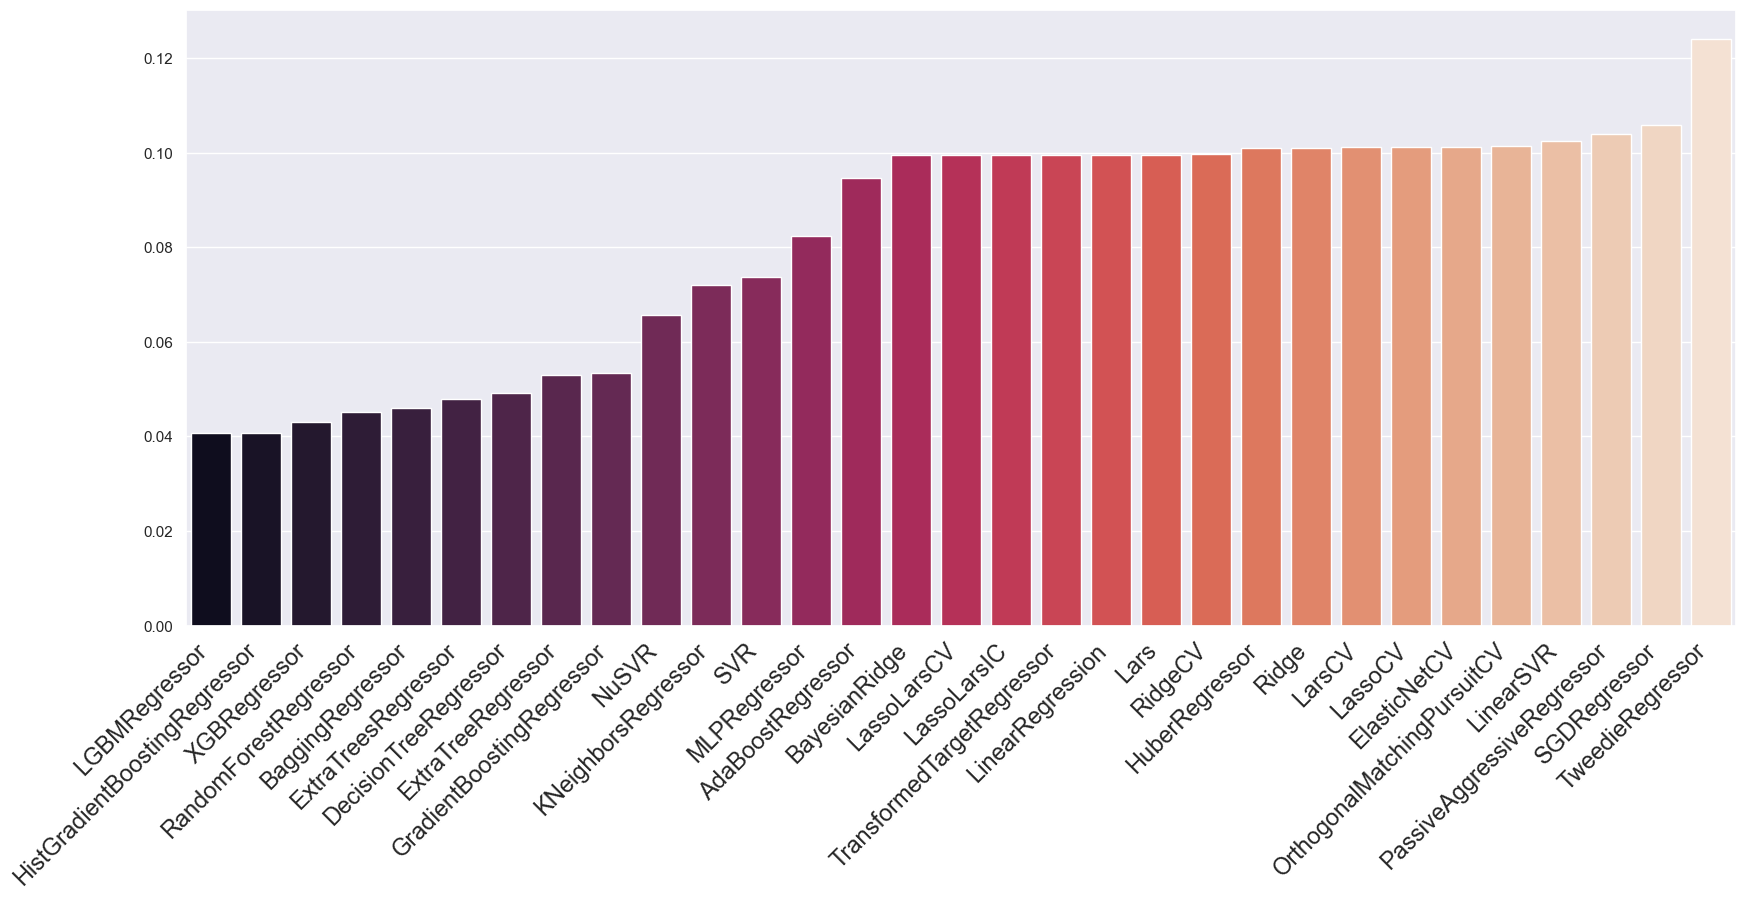

In [51]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(range(31)), y=list(models['RMSE'])[:31], palette="rocket")
plt.xticks(list(range(31)), list(models['RMSE'].index)[:31], rotation=45, fontsize='17', horizontalalignment='right')

# To predict new material candidates

In [18]:
# Load ML model
filename = 'regressor.sav'
reg = pickle.load(open(filename, 'rb'))

pred_data = pd.read_excel('data/to_predict.xlsx')
pred_data.drop(pred_data.columns[0], axis=1,inplace=True)
pred_data.head()
LABEL = "Oxygen vacancy"

samplename = pred_data.iloc[:,0]
Y_pred_true = pred_data.loc[:, LABEL].values
X_pred = pred_data.iloc[:, 2:]
T_pred = pred_data.iloc[:,-1]

Y_pred_pred = pd.Series(reg.predict(X_pred))

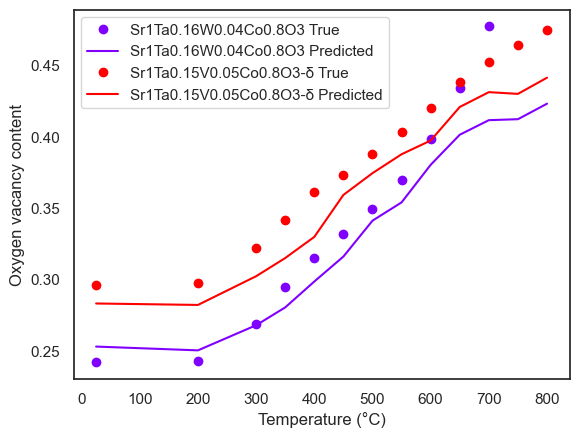

In [21]:
Spool = samplename.unique().tolist()

from matplotlib.pyplot import cm

n = len(Spool)
color = cm.rainbow(np.linspace(0, 1, n))
PredData = pd.DataFrame()

i=0
for sample in Spool:
    plt.plot(T_pred[samplename==sample], Y_pred_true[samplename==sample],'o', color=color[i], label=sample + ' True')
    plt.plot(T_pred[samplename==sample], Y_pred_pred[samplename==sample],'-', color=color[i], label=sample + ' Predicted')

    PredData[sample + ' Temperature'] = T_pred[samplename==sample].values
    PredData[sample + ' Predicted oxygen vacancy content'] = Y_pred_pred[samplename==sample].values

    i=i+1

plt.legend()
plt.xlabel('Temperature (\u00B0C)')
plt.ylabel('Oxygen vacancy content')

PredData.to_excel('to_predict_output.xlsx')